In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('../../Data/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# Compute the observed difference in completion rates
control_mean = df.query('group == "control"').completed.mean()
experiment_mean = df.query('group == "experiment"').completed.mean()
observed_diff = experiment_mean - control_mean
print('Control mean: ', control_mean)
print('Experiment mean: ', experiment_mean)
print('Difference: ', observed_diff)

Control mean:  0.3719951923076923
Experiment mean:  0.3935334872979215
Difference:  0.02153829499022919


(array([  10.,   85.,  449., 1353., 2457., 2778., 1837.,  776.,  223.,
          32.]),
 array([-0.0381512 , -0.02679438, -0.01543755, -0.00408072,  0.0072761 ,
         0.01863293,  0.02998976,  0.04134658,  0.05270341,  0.06406024,
         0.07541706]),
 <BarContainer object of 10 artists>)

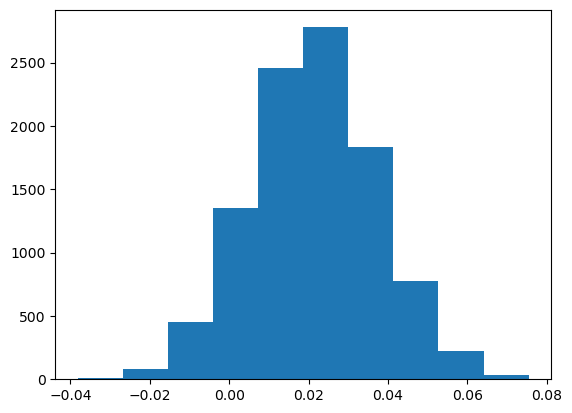

In [4]:
# Create a sampling distribution of the difference in completion rates
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control_mean = sample.query('group == "control"').completed.mean()
    experiment_mean = sample.query('group == "experiment"').completed.mean()
    diffs.append(experiment_mean - control_mean)

# convert to numpy array
diffs = np.array(diffs)

# Plot the sampling distribution
plt.hist(diffs)

p-value:  0.0846


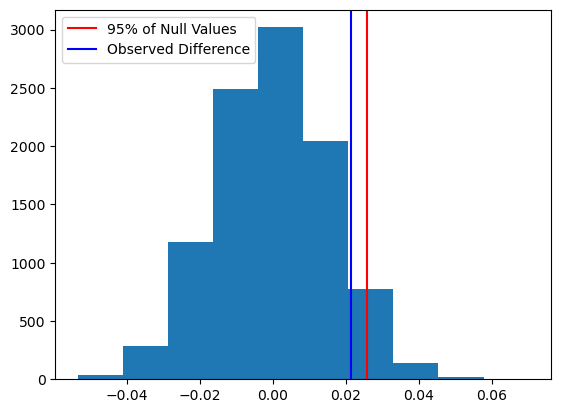

In [5]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
print('p-value: ', (null_vals > observed_diff).mean())

# Plot the null distribution
plt.hist(null_vals)
plt.axvline(x=np.percentile(null_vals, 95), color='red')
plt.axvline(x=observed_diff, color='blue')
plt.legend(('95% of Null Values', 'Observed Difference'))
plt.show()

With a p-value greater than 0.05, it appears our statistic could be drawn from the null. Thus, we fail reject to reject $H_0$.